In [23]:
import pandas as pd
import numpy as np

import keras
from keras.preprocessing.image import ImageDataGenerator, image
from keras.applications import mobilenet_v2
from keras import layers
from keras import models
from tensorflow.keras.models import Sequential, Model
from keras import optimizers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, InputLayer
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import math
from sklearn.metrics import confusion_matrix, classification_report

import glob
import os
from pathlib import Path
import shutil

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/modeltwo/train'
validation_dir = '/content/drive/MyDrive/modeltwo/validation'
test_dir = '/content/drive/MyDrive/modeltwo/test'

In [16]:
base_model = mobilenet_v2.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3)) 
 
for layer in base_model.layers:
    layer.trainable = False    

x = base_model.output
x = Flatten()(x) 
x = Dense(100, activation='relu')(x) 
x = Dense(50, activation='relu')(x)
x = Dropout(0.2) (x)

predictions = Dense(1, activation='sigmoid')(x) 

model = Model(base_model.input, predictions)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(224,224),
        batch_size=30,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='binary')

Found 1200 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [28]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [29]:
history = model.fit(train_generator, steps_per_epoch=20, 
                    validation_data=validation_generator,
                    validation_steps=10,
                    epochs=30, 
                    callbacks= es) 

Epoch 1/30
20/20 [==============================] - 48s 2s/step - loss: 1.0830e-04 - accuracy: 1.0000 - val_loss: 0.6579 - val_accuracy: 0.9100
Epoch 2/30
20/20 [==============================] - 48s 2s/step - loss: 1.1801e-04 - accuracy: 1.0000 - val_loss: 0.6095 - val_accuracy: 0.9250
Epoch 3/30
20/20 [==============================] - 48s 2s/step - loss: 8.7522e-05 - accuracy: 1.0000 - val_loss: 0.9349 - val_accuracy: 0.8950
Epoch 4/30
20/20 [==============================] - 47s 2s/step - loss: 8.2393e-05 - accuracy: 1.0000 - val_loss: 0.6394 - val_accuracy: 0.9050
Epoch 5/30
20/20 [==============================] - 47s 2s/step - loss: 9.1850e-05 - accuracy: 1.0000 - val_loss: 0.4410 - val_accuracy: 0.9400
Epoch 6/30
20/20 [==============================] - 46s 2s/step - loss: 6.8614e-05 - accuracy: 1.0000 - val_loss: 0.4462 - val_accuracy: 0.9250
Epoch 7/30
20/20 [==============================] - 47s 2s/step - loss: 8.7629e-05 - accuracy: 1.0000 - val_loss: 0.7247 - val_accuracy:

In [ ]:
model.save('surneo_transfer.h5')


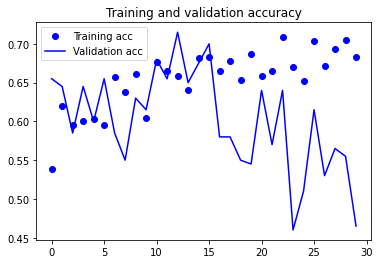

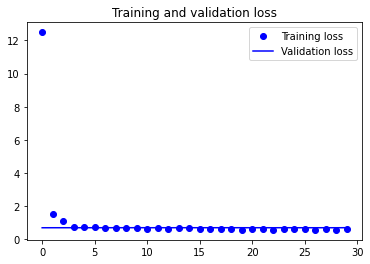

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
prediction = model.predict_classes(validation_generator)

print(confusion_matrix(validation_generator.labels, prediction))
print(classification_report(validation_generator.labels, prediction))